# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import ParenthesizationDataset, ParenthesizationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Initialization
Set the parameters here for training and initialize the train/test datasets, data loaders, model, loss function and optimizer.

In [2]:
n = 7
epochs = 100
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 32

# TODO: Create the datasets, model, loss function, optimizer, and data loader.

loss_values = []  # Initialize the list to store loss values

# Define the device to be used for training and evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the datasets
dataset = ParenthesizationDataset(n)
train_size = int(train_split * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = ParenthesizationModel(n).to(device)

# Define the loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

print("Initialization complete.")

Initialization complete.


# Training the model
* Call `train_one_epoch` repeatedly to train the model once over the entire training dataset.
* Print out the epoch number and loss after each training call to verify that the loss is going down.
* Record the loss values in a list so that it can be plotted in the cell below.
* After training, call `evaluate_model` to get the confusion matrix.
* Save the model as `models/linear_model_{n}.pt`.

In [3]:
"""
loss = []
for epoch in range(epochs):
    # TODO
    pass
"""
for epoch in range(epochs):
    # Train the model for one epoch
    epoch_loss = train_one_epoch(train_loader, model, loss_fn, optimizer, device)
    
    # Print the epoch number and loss
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss}")
    
    # Record the loss value
    loss_values.append(epoch_loss)

# After training, evaluate the model
confusion_matrix = evaluate_model(model, test_dataset)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

# Create the models directory if it does not exist
os.makedirs("models", exist_ok=True)

# Save the model
model_save_path = f"models/linear_model_{n}.pt"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/100, Loss: 0.7508462261069905
Epoch 2/100, Loss: 0.704183732921427
Epoch 3/100, Loss: 0.6627156734466553
Epoch 4/100, Loss: 0.6283784454519098
Epoch 5/100, Loss: 0.5997518382289193
Epoch 6/100, Loss: 0.5712196664376692
Epoch 7/100, Loss: 0.5501094812696631
Epoch 8/100, Loss: 0.5306620841676538
Epoch 9/100, Loss: 0.5087157460776243
Epoch 10/100, Loss: 0.4937608133662831
Epoch 11/100, Loss: 0.4796370349147103
Epoch 12/100, Loss: 0.4675493064251813
Epoch 13/100, Loss: 0.4549823308532888
Epoch 14/100, Loss: 0.4428196278485385
Epoch 15/100, Loss: 0.4368526055054231
Epoch 16/100, Loss: 0.4256243502551859
Epoch 17/100, Loss: 0.41823388365182007
Epoch 18/100, Loss: 0.4128137528896332
Epoch 19/100, Loss: 0.40599690648642456
Epoch 20/100, Loss: 0.3966787647117268
Epoch 21/100, Loss: 0.3935525512153452
Epoch 22/100, Loss: 0.38473726538094605
Epoch 23/100, Loss: 0.37967572564428503
Epoch 24/100, Loss: 0.37550127370791003
Epoch 25/100, Loss: 0.37340240451422607
Epoch 26/100, Loss: 0.3675390

# Plot the loss curve
Plot the loss curve with appropriate figure title and axis labels. Save the resulting figure in `figures/loss_curve_{n}.png`.

Loss curve saved to figures/loss_curve_7.png


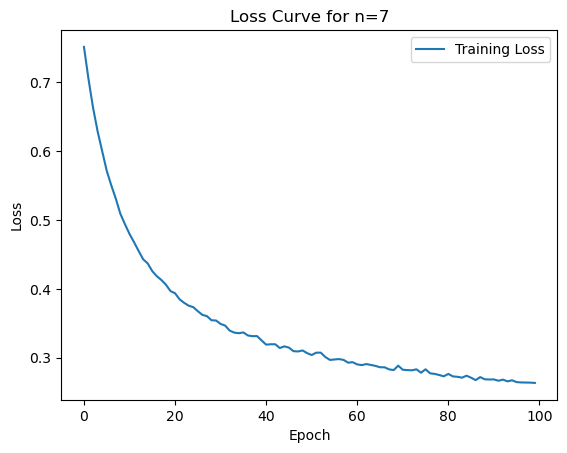

In [4]:
import os
import matplotlib.pyplot as plt

# Create the figures directory if it does not exist
os.makedirs("figures", exist_ok=True)


# Plot the loss curve
plt.figure()
plt.plot(loss_values, label='Training Loss')
plt.title(f'Loss Curve for n={n}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the plot
figure_save_path = f"figures/loss_curve_{n}.png"
plt.savefig(figure_save_path)
print(f"Loss curve saved to {figure_save_path}")


# Analyze accuracy using the confusion matrix
- Print out the accuracy within each of the prediction classes.
- Print out the size of each prediction class.
- Print out the overall accuracy.

In [5]:
def analyze_accuracy(confusion_matrix):
    """
    Analyzes the accuracy using the confusion matrix.
    
    Args:
        confusion_matrix (list): A 2x2 confusion matrix where rows represent true labels and columns represent predicted labels.
    
    Prints:
        - Accuracy within each of the prediction classes.
        - The size of each prediction class.
        - The overall accuracy.
    """
    # Calculate the accuracy within each class
    true_positives_class_0 = confusion_matrix[0][0]
    true_positives_class_1 = confusion_matrix[1][1]
    
    total_class_0 = sum(confusion_matrix[0])
    total_class_1 = sum(confusion_matrix[1])
    
    accuracy_class_0 = true_positives_class_0 / total_class_0 if total_class_0 != 0 else 0
    accuracy_class_1 = true_positives_class_1 / total_class_1 if total_class_1 != 0 else 0
    
    # Print the accuracy within each prediction class
    print(f"Accuracy within class 0: {accuracy_class_0:.2f}")
    print(f"Accuracy within class 1: {accuracy_class_1:.2f}")
    
    # Print the size of each prediction class
    print(f"Size of class 0: {total_class_0}")
    print(f"Size of class 1: {total_class_1}")
    
    # Calculate and print the overall accuracy
    total_correct = true_positives_class_0 + true_positives_class_1
    total_samples = total_class_0 + total_class_1
    overall_accuracy = total_correct / total_samples if total_samples != 0 else 0
    
    print(f"Overall accuracy: {overall_accuracy:.2f}")

# Assuming confusion_matrix is already computed from evaluate_model function
confusion_matrix = evaluate_model(model, test_dataset)

# Analyze accuracy using the confusion matrix
analyze_accuracy(confusion_matrix)


Accuracy within class 0: 0.78
Accuracy within class 1: 1.00
Size of class 0: 80
Size of class 1: 92
Overall accuracy: 0.90


# Plot the model weights
Can you interpret what the model is doing? Plot the model weights using `plt.imshow()` to get a heatmap. Choose a colormap from https://matplotlib.org/stable/users/explain/colors/colormaps.html that you prefer. I default to the `bwr` colormap where negative values are blue, positive value are red, and values close to zero are white.

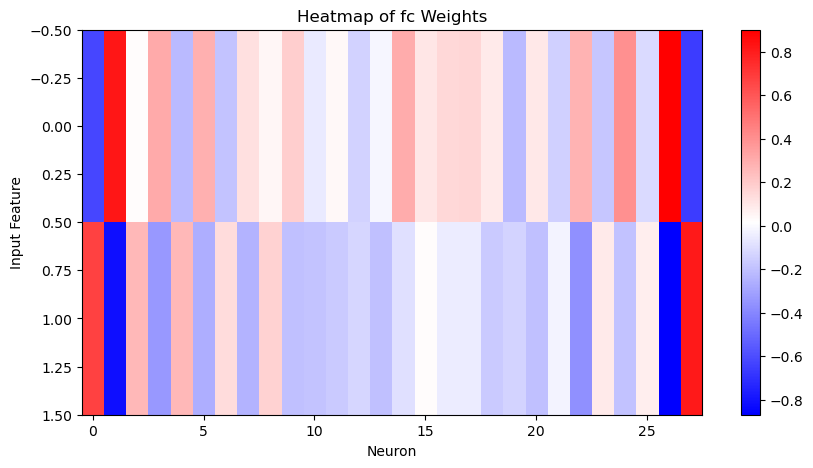

In [6]:
import matplotlib.pyplot as plt

def plot_model_weights(model, layer_name='fc', cmap='bwr'):
    """
    Plots the weights of the specified layer of the model using a heatmap.

    Args:
        model (torch.nn.Module): The trained model.
        layer_name (str): The name of the layer whose weights are to be plotted.
        cmap (str): The colormap to use for the heatmap.
    """
    # Extract the weights from the specified layer
    weights = getattr(model, layer_name).weight.detach().cpu().numpy()

    # Plot the weights using plt.imshow()
    plt.figure(figsize=(10, 5))
    plt.imshow(weights, aspect='auto', cmap=cmap)
    plt.colorbar()
    plt.title(f'Heatmap of {layer_name} Weights')
    plt.xlabel('Neuron')
    plt.ylabel('Input Feature')
    plt.show()

# Assuming the model is already trained
plot_model_weights(model)

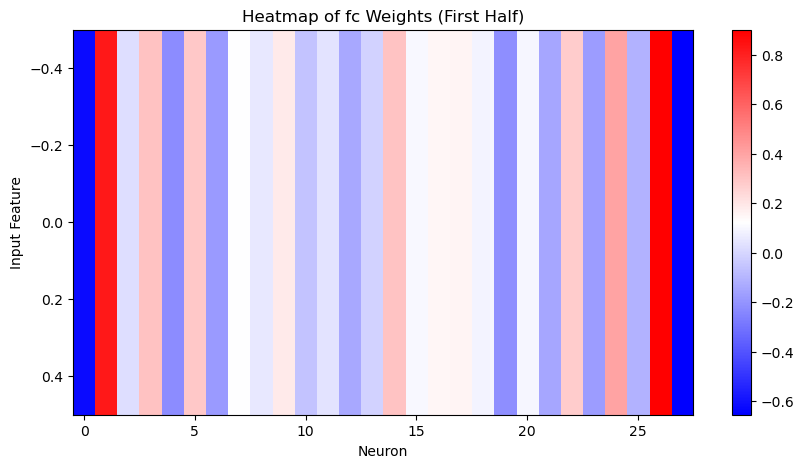

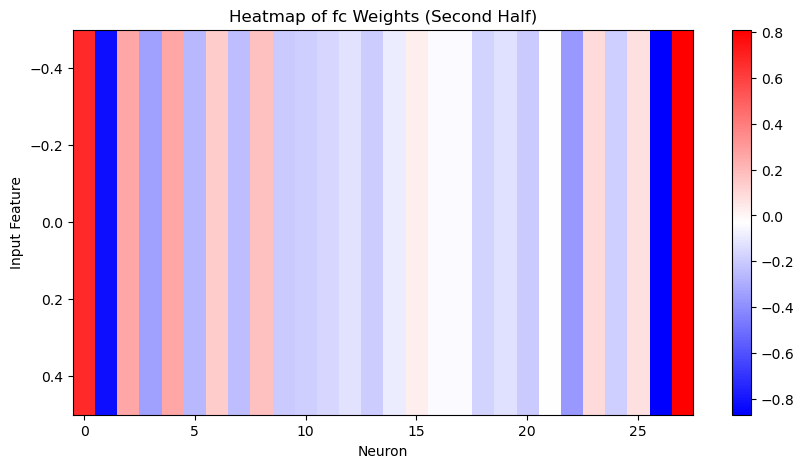

In [7]:
import matplotlib.pyplot as plt

def plot_model_weights(model, layer_name='fc', cmap='bwr'):
    """
    Plots the weights of the specified layer of the model using two separate heatmaps.

    Args:
        model (torch.nn.Module): The trained model.
        layer_name (str): The name of the layer whose weights are to be plotted.
        cmap (str): The colormap to use for the heatmap.
    """
    # Extract the weights from the specified layer
    weights = getattr(model, layer_name).weight.detach().cpu().numpy()

    # Split the weights into two halves
    mid_index = weights.shape[0] // 2
    first_half_weights = weights[:mid_index, :]
    second_half_weights = weights[mid_index:, :]

    # Plot the weights for the first half
    plt.figure(figsize=(10, 5))
    plt.imshow(first_half_weights, aspect='auto', cmap=cmap)
    plt.colorbar()
    plt.title(f'Heatmap of {layer_name} Weights (First Half)')
    plt.xlabel('Neuron')
    plt.ylabel('Input Feature')
    figure_save_path = f"figures/Heatmap_1.png"
    plt.savefig(figure_save_path)
    plt.show()

    # Plot the weights for the second half
    plt.figure(figsize=(10, 5))
    plt.imshow(second_half_weights, aspect='auto', cmap=cmap)
    plt.colorbar()
    plt.title(f'Heatmap of {layer_name} Weights (Second Half)')
    plt.xlabel('Neuron')
    plt.ylabel('Input Feature')
    figure_save_path = f"figures/Heatmap_2.png"
    plt.savefig(figure_save_path)
    plt.show()

# Assuming the model is already trained
plot_model_weights(model)


# "Translate" the model into code.
Implement `simple_evaluate` which condenses the model's "logic" into a single if-else statement. Run this evaluation function over the test set to produce a new confusion matrix and see how it performs compared to the model you train.

In [8]:
'''
# Try to condense the linear model down into a single if-else statement. 
def simple_evaluate(input):
    # TODO
    pass
'''
def simple_evaluate(input):
    """
    Evaluates the input using a simplified if-else statement based on the model's weights and bias.

    Args:
        input (torch.Tensor): The input tensor.

    Returns:
        int: The predicted class (0 or 1).
    """
    # Extract the first two and last two weights and bias from the model's first layer
    weights = model.fc.weight.detach().cpu().numpy()
    bias = model.fc.bias.detach().cpu().numpy()

    # Convert input to numpy array and flatten if necessary
    input = input.detach().cpu().numpy().flatten()

    # Use the first two and last two elements of weights and inputs
    simplified_input = np.concatenate((input[:2], input[-2:]))
    simplified_weights = np.concatenate((weights[0, :2], weights[0, -2:]))

    # Calculate the linear combination of inputs and weights
    linear_combination = np.dot(simplified_weights, simplified_input) + bias[0]

    # Apply the decision rule using a simple if-else statement
    if linear_combination > 0:
        return 0
    else:
        return 1

In [9]:
import numpy as np

def evaluate_simple_model(test_dataset):
    """
    Evaluates the simple evaluation function using the test dataset and returns the confusion matrix.

    Args:
        test_dataset (torch.utils.data.Dataset): The dataset used for evaluation.

    Returns:
        list: A 2x2 confusion matrix where rows represent true labels and columns represent predicted labels.
    """
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    confusion_matrix = [[0, 0], [0, 0]]
    with torch.no_grad():
        for inputs, true_labels in test_loader:
            inputs, true_labels = inputs.to(device), true_labels.to(device)
            for input, true_label in zip(inputs, true_labels):
                predicted_label = simple_evaluate(input)
                confusion_matrix[true_label.item()][predicted_label] += 1
    return confusion_matrix

# Evaluate the simple evaluation function
simple_confusion_matrix = evaluate_simple_model(test_dataset)

# Print the confusion matrix for the simple evaluation function
print("Simple Evaluation Confusion Matrix:")
print(simple_confusion_matrix)

# Analyze accuracy using the confusion matrix for the simple evaluation function
analyze_accuracy(simple_confusion_matrix)


Simple Evaluation Confusion Matrix:
[[58, 22], [0, 92]]
Accuracy within class 0: 0.72
Accuracy within class 1: 1.00
Size of class 0: 80
Size of class 1: 92
Overall accuracy: 0.87
